# Image Processing SS 20 - Assignment - 01

### Deadline is 29.4.2020 at 12:00

Please solve the assignments together with a partner. Write the names of yourself and your partner and a link to your repository in a text-submission in the Whiteboard. You have to do this EVERY WEEK.
I will run every notebook. Make sure the code runs without errors, when clicking `Kernel` -> `Restart & Run All`.


## Introduction to Python / Numpy

* [Learn Python in 15 minutes](https://learnxinyminutes.com/docs/python3/): We will use Python 3.
* [Numpy for Matlab Users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#general-purpose-equivalents)
* [Numpy Quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)

## Libraries

We will use the following libraries:

* matplotlib
* numpy
* scipy
* skimage


# Exercise 0 - Setup Development Enviroment - [1 Point]

Find a partner, follow the steps in the [README](https://github.com/BildverarbeitungSS20/Hausaufgaben/blob/master/README.md) and paste a link to your repository and your names into the KVV assignment box. Also include your names inside your solution.
You do not need to upload any files to MyCampus Whiteboard. I will clone your repository.

# Name:Jiahe Mai und Shiyao Zhao

In [20]:
# display the plots inside the notebook
%matplotlib inline

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

The [skimage](http://scikit-image.org/) library comes with multiple useful test images.  Let's start with an image of an astronaut. 

In [22]:
from skimage.data import astronaut

In [23]:
img = astronaut()   # Get the image
print(img.shape)    # the dimension of the image
print(img.dtype)    # the image type

(512, 512, 3)
uint8


In [69]:
img = img / 255.

We have a `(512, 512, 3)` array of unsigned bytes. At `img[x, y]` there are three values for R,G and B.

We will always work with floating point arrays between 0 and 1. 

Lets display the image.

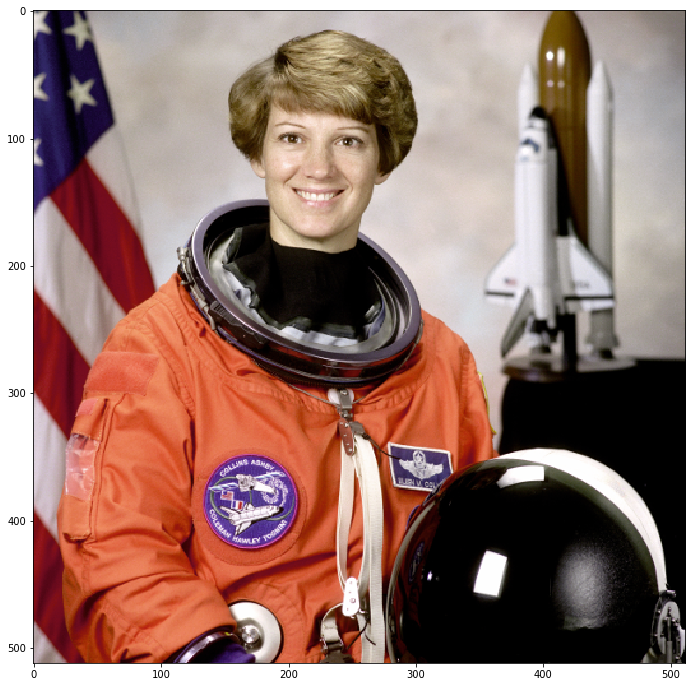

In [70]:
plt.imshow(img)
plt.show()

This is [Eileen Collins](https://en.wikipedia.org/wiki/Eileen_Collins). She was the first astronaut 
 to fly the Space Shuttle through a complete 360-degree pitch maneuver. What an inspiring woman.

## Exercise 1 - Plot -       [1 Point]

Plot the R, G and B channels separately.

In [71]:
# Your code here
import cv2
(B,G,R)=cv2.split(img)
cv2.imshow("Red",R)
cv2.imshow("Green",G)
cv2.imshow("Blue",B)
cv2.waitKey (0)  
cv2.destroyAllWindows()

## Exercise 2 - RGB to HSV [6 Points]

Implement the `rgb_to_hsv` and `hsv_to_rgb` functions. Don't use any color conversion functions from a library.


In [79]:
def rgb_to_hsv(x):
    """
    Converts the numpy array `x` from RGB to the HSV. 
    """
    # Your code here
    b,g,r=cv2.split(img)
    h = img.shape[0]
    w = img.shape[1]
    r, g, b = r, g, b/255.0
    H = np.zeros((h,w),np.float32)
    s = np.zeros((h, w), np.float32)
    v = np.zeros((h, w), np.float32)
    for i in range(512):
        for j in  range(512):
            mx = max(r[i][j], g[i][j], b[i][j])
            mn = min(r[i][j], g[i][j], b[i][j])
            df = mx-mn
            if mx == mn:
                H[i][j] = 0
            elif mx == r[i][j]:
                H[i][j] = (60 * ((g[i][j]-b[i][j])/df) + 360) % 360
            elif mx == g[i][j]:
                H[i][j] = (60 * ((b[i][j]-r[i][j])/df) + 120) % 360
            elif mx == b[i][j]:
                H[i][j] = (60 * ((r[i][j]-g[i][j])/df) + 240) % 360
            if mx == 0:
                s[i][j] = 0
            else:
                s[i][j] = df/mx
                
            v[i][j] = mx
            
    
    
    x=cv2.merge([H,s,v])
    
    return x

In [83]:
import math
def hsv_to_rgb(x):
    """
    Converts the numpy array `x` from HSV to the RGB. 
    """
    # Your code here
    h_hsv,s_hsv,v_hsv=cv2.split(x)
    h = img.shape[0]
    w = img.shape[1]
    R = np.zeros((h,w),np.float32)
    B = np.zeros((h, w), np.float32)
    G = np.zeros((h, w), np.float32)

    for i in range(0,h):
        for j in  range(0,w):
            h_hsv[i][j]= float(h_hsv[i][j])
            s_hsv[i][j]= float(s_hsv[i][j])
            v_hsv[i][j]= float(v_hsv[i][j])
            h_hsv60= h_hsv[i][j]/ 60.0
            h_hsv60f= math.floor(h_hsv60)
            hi = int(h_hsv60f) % 6
            f = h_hsv60-  h_hsv60f
            p = v_hsv[i][j] * (1 - s_hsv[i][j])
            q = v_hsv[i][j]* (1 - f * s_hsv[i][j])
            t = v_hsv[i][j] * (1 - (1 - f) * s_hsv[i][j])
            if   hi == 0: R[i][j],G[i][j],B[i][j] = v_hsv[i][j], t, p
            elif hi == 1: R[i][j],G[i][j],B[i][j] = q, v_hsv[i][j], p
            elif hi == 2: R[i][j],G[i][j],B[i][j] = p, v_hsv[i][j], t
            elif hi == 3: R[i][j],G[i][j],B[i][j] = p, q, v_hsv[i][j]
            elif hi == 4: R[i][j],G[i][j],B[i][j] = t, p, v_hsv[i][j]
            elif hi == 5: R[i][j],G[i][j],B[i][j] = v_hsv[i][j], p, q
            R[i][j], G[i][j], B[i][j] =R[i][j], G[i][j] , B[i][j]*255
    
    x=cv2.merge([R,G,B])
    return  x

Plot the saturation of the astronaut image

In [84]:
# your code
img_as_hsv = rgb_to_hsv(img)
cv2.imshow("HSV",img_as_hsv)
cv2.waitKey (0)  
cv2.destroyAllWindows()

Increase the saturation by a factor of 2, convert it back to RGB and plot the result.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


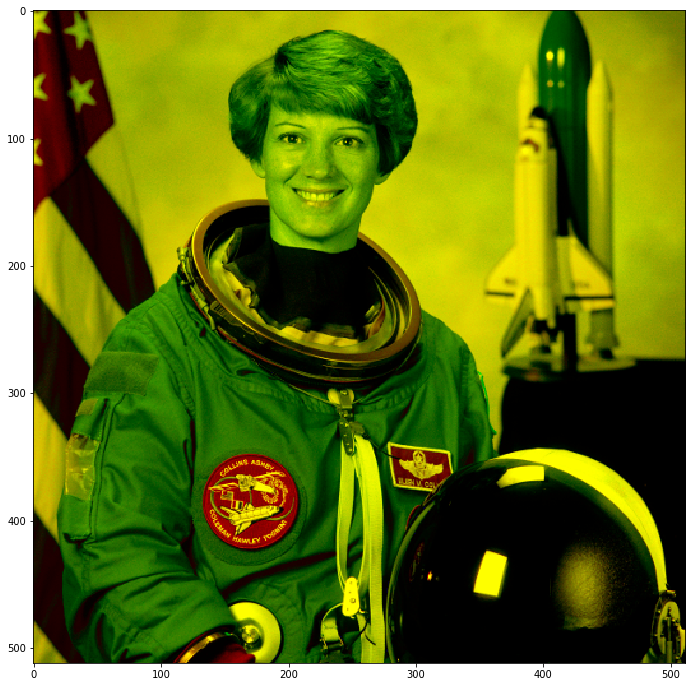

In [85]:
# your code
h,s,v=cv2.split(img_as_hsv )
s=s*2
img1=np.dstack([h,s,v])
img_as_rgb = hsv_to_rgb(img1)
plt.imshow(img_as_rgb)

## Exercise 3 - Calculation [2 Points]

In the figure below you can see the [CIE-XYZ](https://de.wikipedia.org/wiki/CIE-Normvalenzsystem) color space.
![](https://upload.wikimedia.org/wikipedia/commons/4/49/CIE-Normfarbtafel.png)

What are the approximate x,y,z values for the following Adobe RGB colors:
* `(0, 0.5, 0.5)`
* `(0.33, 0.33, 0.33)`

A sodium-vapor lamp shines with double the intensity of a mercury-vapor lamp
. The light from the sodium lamp only contains 
the spectral line at `589,00nm` and the light from the mercury lamp only the
spectral line at `435,83 nm`.

What color does a human experience? What are the approximate x,y,z values?


In [67]:
def rgb_to_xyz(x):
    a=1/0.17697*np.array([[0.49,0.31,0.20],
                          [0.17697,0.81240,0.01063],
                          [0.00,0.01,0.99]])
    
    return np.dot(a,x)

In [68]:
print(rgb_to_xyz([0,0.5,0.5]))
print(rgb_to_xyz([0.33,0.33,0.33]))

[1.44092219 2.32533763 2.82533763]
[1.86472283 1.86472283 1.86472283]


In [3]:
print('for 589.00nm x,y,z approximate are (4.661,3.240,0.000)')
print('for 435.83nm x,y,z approximate are (8.2345,2.442,41.681)') #with the data from Internet

for 589.00nm x,y,z approximate are (4.661,3.240,0.000)
for 435.83nm x,y,z approximate are (8.2345,2.442,41.681)
